Verificando informações referentes aos dados de nascimentos dos animais por linhagem

In [36]:
#Importando bibliotecas necessárias para a análise.

import matplotlib.pyplot as plt 
import pandas as pd 
import os
import seaborn as sns


plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.rcParams['xtick.labelsize'] = 20 #tamanho da fonte
plt.rcParams['ytick.labelsize'] = 20 #tamanho da fonte

In [37]:
#Filtros para trabalhar com os dados da minha dataframe original

nume_ani = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
nume_ani = nume_ani[(nume_ani['num_ani'] < 200) 
                    & (nume_ani['util'] == 'nasc')
                    & (nume_ani['ling'] != 'Test')]
 #descarte[(descarte['obs_desc'] != 'AAA')
                   


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Alterando formato da data

datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex']

for d in datas:
    nume_ani[d] = pd.to_datetime(nume_ani[d], unit = 's')
    
nume_ani.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [38]:
#numero total de animais por nascimento
nume_ani['num_ani'].sum()

15106

In [39]:
#numero total de eventos de nascimento
len(nume_ani)

1808

In [40]:
#Substituindo linhagens  - ' S129WT', 'S129WT'] PARA '129/SV-E'

nume_ani['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)
#descarte[(descarte['ling'] == '129/SV-E')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

nume_ani['ling'].replace(' S129KO', 'S129KO', inplace=True)
#descarte[(descarte['ling'] == 'S129KO')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

nume_ani['ling'].replace(['C57BL06WT','C57BL06WT\t'], 'C57BL/6', inplace=True)
#descarte[(descarte['ling'] == 'C57BL/6')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

nume_ani['ling'].replace(['Swiss A','Swiss/CFW', 'Swiss/CFW A'], 'Swiss-1 A', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 A')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

nume_ani['ling'].replace(['Swiss B','Swiss/CFW B'], 'Swiss-1 B', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 B')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

nume_ani['ling'].replace(['Swiss C','Swiss/CFW C'], 'Swiss-1 C', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 C')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

nume_ani['ling'].replace(['Swiss D','Swiss/CFW D'], 'Swiss-1 D', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 D')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

nume_ani['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 E')].info()
'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss-2 A' PARA 'Swiss-2 A'

nume_ani['ling'].replace('Swiss-2 A ', 'Swiss-2 A', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 E')].info()

In [41]:
nume_ani['ling'].value_counts()

Balb/c       498
C57BL/6      460
S129KO       250
129/SV-E     149
C3H          102
Swiss-1 A     48
Swiss-1 E     47
Swiss-1 C     38
Swiss-1 B     36
Swiss-1 D     33
Swiss-2 C     27
DBA/1J        24
Swiss-2 B     24
Swiss-2 E     21
Swiss-2 D     21
Swiss-2 A     21
AG129          9
Name: ling, dtype: int64

Calculo de media e mediana para printar no gráfico as faixas verde e vermelha

In [42]:
mediana = nume_ani.groupby('ling')                      #Agrupando por linhagem e guardando em uma variável
mediana = round(mediana['num_ani'].sum().median(),2)    #Somando o numero total de animas e pedidndo a mediana
mediana

381.0

In [43]:
media_g = nume_ani.groupby('ling')                      #Agrupando por linhagem e guardando em uma variável
media = round(media_g['num_ani'].sum().mean(),2)        #Somando o numero total de animais e calculando a média
media                                                   #função .round() serve para arredondar

888.59

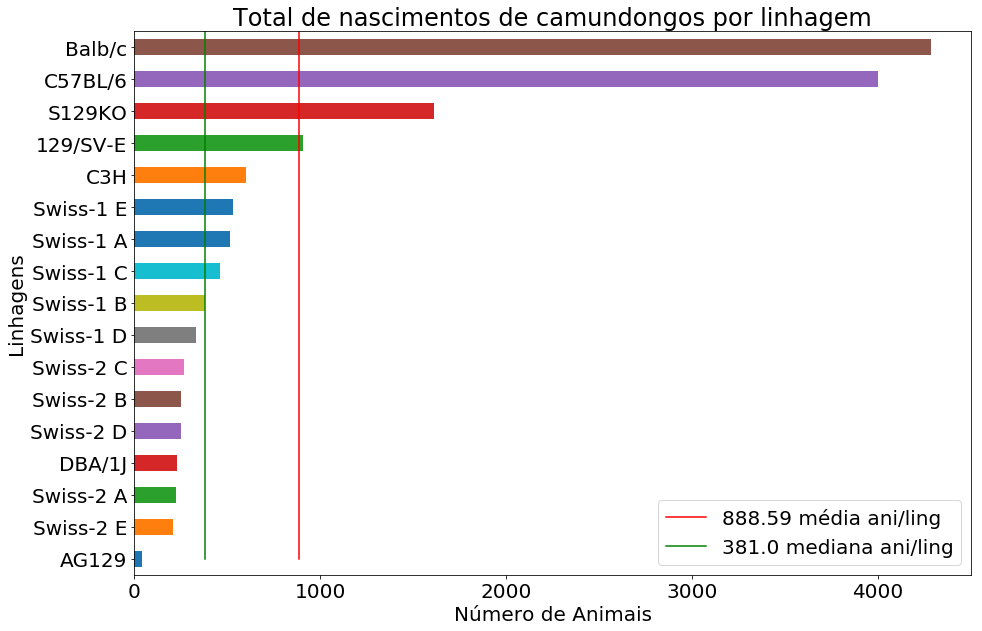

In [44]:
plt.figure(figsize=(15,10)) #tamanho do gráfico
plt.title('Total de nascimentos de camundongos por linhagem') #título do gráfico

plot = nume_ani.groupby('ling') #pedindo pra agrupar por linhagem
plot['num_ani'].sum().sort_values(ascending=True).plot( #plotando a soma de animais e ordenando do maior para o menor
kind='barh'
)

plt.plot( #função para plotar o gráfico
    [media, media], #faixa que marca a média
    [len(nume_ani.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana,mediana], #faixa que marca a mediana
    [len(nume_ani.index), 0], 
    c='green' #cor verde da faixa
)


plt.legend([str(media) + ' média ani/ling', str(mediana) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y
#plt.annotate()
plt.savefig(
    fname="../resultados/17-numero_total_animais.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)


In [112]:
media_plot = nume_ani.groupby('ling')                       #agrupando por linhagem e guardando na variável
calcu_mediana = round(mediana_plot['num_ani'].median(), 2)  #calculando a mediana de cada linhagem para plotar traço no gráfico
media_grafico = round(calcu_media.mean(), 2)                #Calculando a media das minhas medianas
media_grafico

8.82

In [116]:
mediana_plot = nume_ani.groupby('ling')                 #agrupando por linhagem e guardando na variável
mediana_grafico = calcu_mediana.median()                #Calculando a mediana da mediana que já foi estabelecida na célula acima
mediana_grafico

10.0

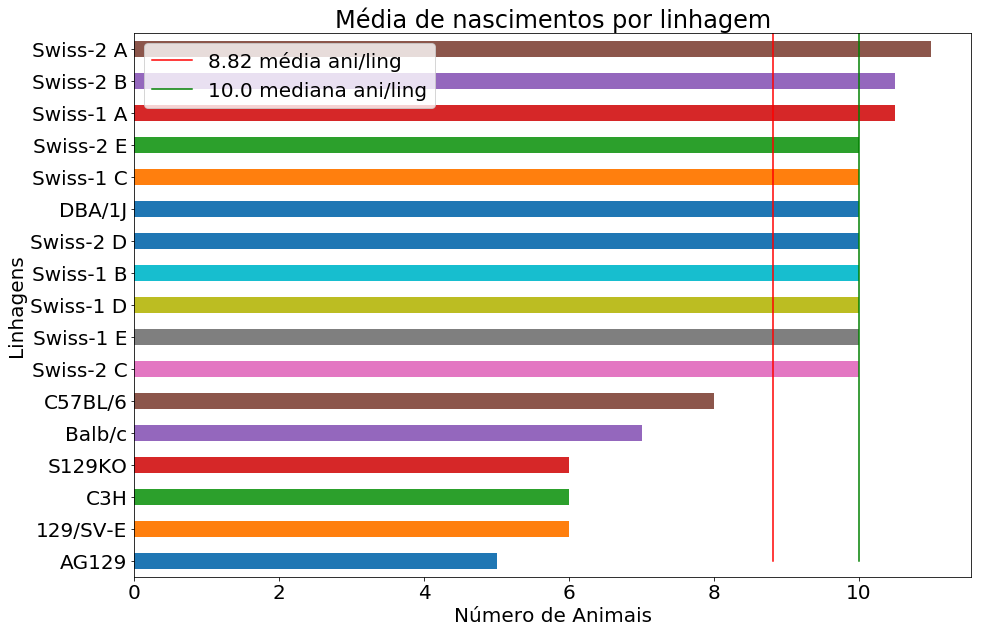

In [118]:
# Plotando Gráfico referente a todos animais produzidos por linhagem


plt.figure(figsize=(15,10))
plt.title('Média de nascimentos por linhagem')

plot = nume_ani.groupby('ling')
plot['num_ani'].median().sort_values(ascending=True).plot(
kind='barh'
)

#Plotagem de faixas (média e mediana)

plt.plot( #função para plotar o gráfico
    [media_grafico, media_grafico], #faixa que marca a média
    [len(nume_ani.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_grafico, mediana_grafico], #faixa que marca a mediana
    [len(nume_ani.index), 0], 
    c='green' #cor verde da faixa
)

#Editando gráfico com legendas

plt.legend([str(media_grafico) + ' média ani/ling', str(mediana_grafico) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y


#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-numero_media_animais.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)



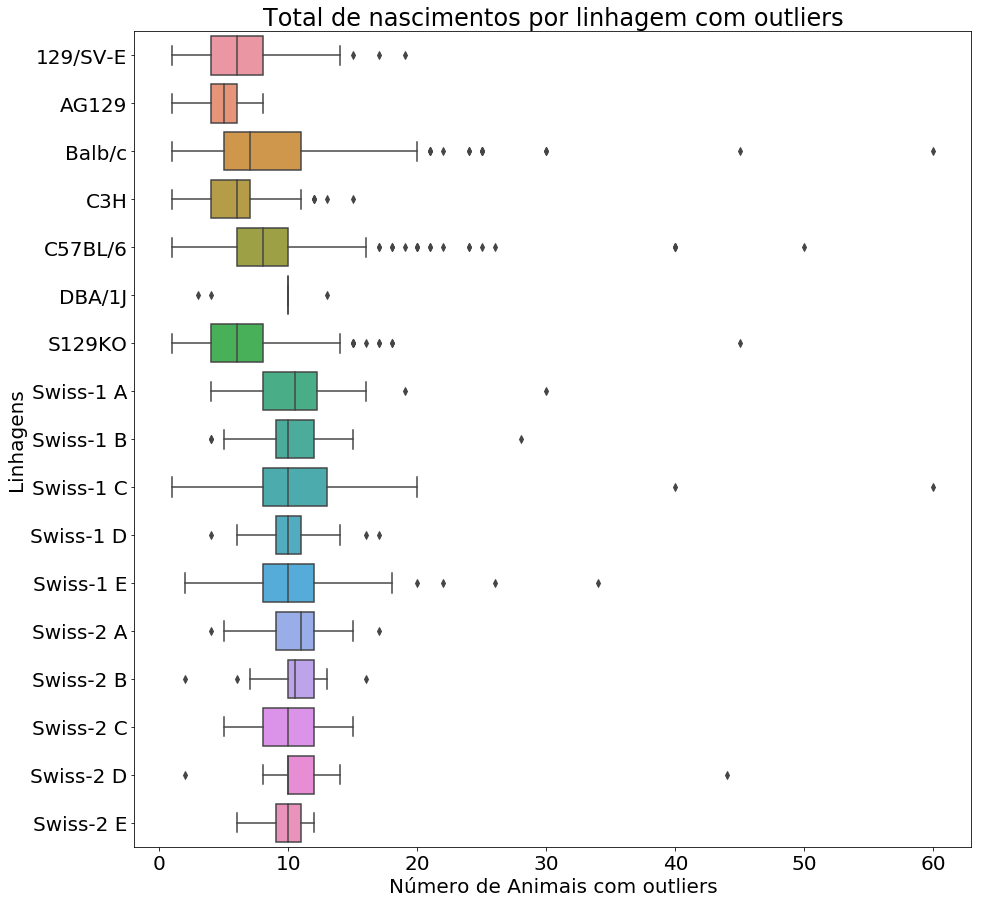

In [119]:
#Valores discrepantes do numero de nascimentos de animais

plt.figure(figsize=(15,15))
plt.title('Total de nascimentos por linhagem com outliers')
sns.boxplot(
    
    y='ling',
    x='num_nasc',
#     hue='ling',
    data=nume_ani.sort_values('ling')
)

plt.xlabel('Número de Animais com outliers') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y

plt.savefig(
    fname="../resultados/17-numero_total_animais_boxplot.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RETIRANDO OS OUTLIERS DOS DADOS

In [123]:
#Criando uma nova Dataframe, filtrando os valores discrepantes
q1 = nume_ani['num_ani'].quantile(0.25)
q3 = nume_ani['num_ani'].quantile(0.75)
iqr = q3 - q1

sem_out = nume_ani[(nume_ani['num_ani'] > (q1 - 1.5 * iqr)) & (nume_ani['num_ani'] < (q3 + 1.5 * iqr))]#['num_ani']
sem_out.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss-1 E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss-1 E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss-1 E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
122,2014-09-23 18:13:24,Tania,Swiss-1 D,10,AAA,1970-01-01 00:11:06,58,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:26:13,2014-09-23 18:13:24,10,2014-10-14 18:13:24,666,666,666,666,AAA,AAA
123,2014-09-23 18:13:24,Tania,Swiss-1 B,10,AAA,1970-01-01 00:11:06,60,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:38:13,2014-09-23 18:13:24,10,2014-10-14 18:13:24,666,666,666,666,AAA,AAA


In [124]:
test_g= sem_out.groupby('ling')
test_g.mean()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
129/SV-E,5.986486,666.0,666.0,666.0,666.0,666.0,666.0,1.040541,1.520270,5.986486,545.128378,482.216216,666.0,666.0
AG129,4.777778,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.000000,4.777778,592.444444,444.777778,666.0,666.0
Balb/c,7.488069,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.592191,7.488069,507.774403,476.221258,666.0,666.0
C3H,5.911765,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.166667,5.911765,529.441176,529.372549,666.0,666.0
C57BL/6,8.020316,666.0,666.0,666.0,666.0,666.0,666.0,1.004515,1.677201,8.020316,562.851016,504.492099,666.0,666.0
DBA/1J,9.583333,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.958333,9.583333,666.000000,666.000000,666.0,666.0
S129KO,6.198381,666.0,666.0,666.0,666.0,666.0,666.0,1.008097,1.684211,6.198381,537.202429,545.190283,666.0,666.0
Swiss-1 A,10.130435,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.217391,10.130435,579.565217,594.021739,666.0,666.0
Swiss-1 B,10.085714,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.314286,10.085714,552.428571,552.400000,666.0,666.0


In [127]:
mediana_g = sem_out.groupby('ling')                      #Agrupando por linhagem e guardando em uma variável
mediana = round(mediana_g['num_ani'].sum().median(),2)    #Somando o numero total de animas e pedidndo a mediana
mediana

333.0

In [128]:
media_g = sem_out.groupby('ling')                      #Agrupando por linhagem e guardando em uma variável
media = round(media_g['num_ani'].sum().mean(),2)        #Somando o numero total de animais e calculando a média
media                                                   #função .round() serve para arredondar

783.71

Text(0, 0.5, 'Linhagens')

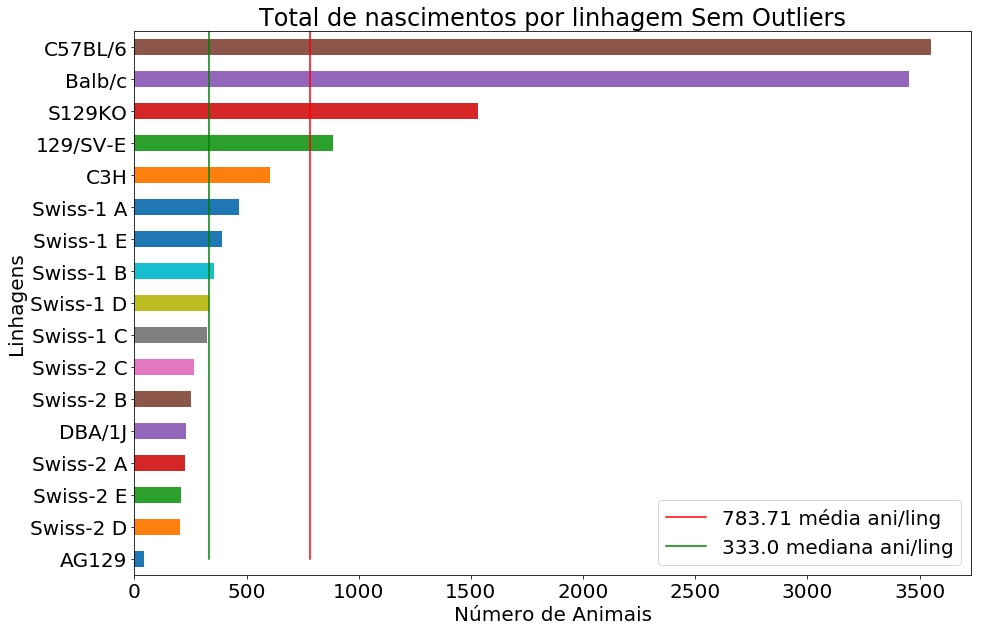

In [129]:
#Gráfico total de animais com a retirada de outliers

plt.figure(figsize=(15,10))
plt.title('Total de nascimentos por linhagem Sem Outliers')

#Calculando a retirada de outliers
q1 = nume_ani['num_ani'].quantile(0.25)
q3 = nume_ani['num_ani'].quantile(0.75)
iqr = q3 - q1

test = nume_ani[(nume_ani['num_ani'] > (q1 - 1.5 * iqr)) & (nume_ani['num_ani'] < (q3 + 1.5 * iqr))]#['num_ani']
test

plot = test.groupby('ling')
plot['num_ani'].sum().sort_values(ascending=True).plot(
kind='barh'
)

plt.plot( #função para plotar o gráfico
    [media, media], #faixa que marca a média
    [len(nume_ani.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana,mediana], #faixa que marca a mediana
    [len(nume_ani.index), 0], 
    c='green' #cor verde da faixa
)


plt.legend([str(media) + ' média ani/ling', str(mediana) + ' mediana ani/ling'])

plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y


In [ ]:
#Bloxplot com a retirada de outliers

plt.figure(figsize=(15,15))
plt.title('Total de nascimentos por linhagem retirando outliers')
sns.boxplot(
    
    y='ling',
    x='num_nasc',
#     hue='ling',
    data=test.sort_values('ling')
)
plt.xlabel('Número de Animais com outliers') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y


In [ ]:
#Calculo de média e mediana sem outlier

media_geral = round(test['num_ani'].sum() / len(test.index), 2) 
mediana_geral = round(test.median()['num_ani'],2)


#Gráfico referente a todos animais produzidos por linhagem


plt.figure(figsize=(15,10))
plt.title('Média de nascimentos por linhagem')

plot = test.groupby('ling')
plot['num_ani'].mean().sort_values(ascending=True).plot(
kind='barh'
)

#Plotagem de faixas (média e mediana)

plt.plot( #função para plotar o gráfico
    [media_geral, media_geral], #faixa que marca a média
    [len(test.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_geral, mediana_geral], #faixa que marca a mediana
    [len(test.index), 0], 
    c='green' #cor verde da faixa
)




plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y
